# Overview on a Low Cloud Scene over Germany

## Libraries

In [1]:
## %load ../scripts/animate_L1_fci.py
import numpy as np
from satpy.scene import Scene
from satpy.resample import get_area_def 
from satpy.writers import get_enhanced_image
import glob
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

/tmp/ipykernel_134525/1332190966.py:4: UserWarning: 'satpy.resample.get_area_def' has been moved to 'satpy.area.get_area_def'. Import from the new location instead (ex. 'from satpy.area import get_area_def'). The old import paths will be removed in Satpy 1.0
  from satpy.resample import get_area_def
/tmp/ipykernel_134525/1332190966.py:5: UserWarning: 'satpy.writers.get_enhanced_image' has been moved to 'satpy.enhancements.enhancer.get_enhanced_image'. Import from the new location instead (ex. 'from satpy.enhancements.enhancer import get_enhanced_image'). The old import paths will be removed in Satpy 1.0
  from satpy.writers import get_enhanced_image


## Open data

In [2]:
#Germany scene
date="20250619"

xc, yc = [8.55, 53.54]
dx,dy = 1,2
x1, x2 = [xc - dx/2, xc + dx/2]
y1, y2 = [yc - dy/2, yc + dy/2]

custom_box=[x1, y1, x2, y2]


chunks="003[7-8]"  #these are the chunks over N Germany

# define path to FCI data folder
datadir="/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/"
channel_name='true_color' # to select channel or RGB composite to visualize


# list of repeat cycles to use in the animation. These should be in the data
# downloaded from eumdac in datadir. One can use all data or a subset, 
# explicitly defining the RC number to use. Generally a daytime animation
# from ~6Z to ~19Z covers RCs numbers from 30 to 120.
RCs=np.arange(37,49)

data = {}
times = {}
for RC in RCs:
    path_to_data = datadir+"*BODY---*_{:04d}_".format(RC)+chunks+"*nc"
    print(path_to_data)
    # find files and assign the FCI reader
    # each FCI full disk repeat cycle contains 40 chunks.
    # to speed processing up we only use the chunks relevant to the ROI
    files = glob.glob(path_to_data)
    print(files)
    # create an FCI scene from the selected files.
    # the satpy reader automatically stitches the chunks
    scn_orig = Scene(reader='fci_l1c_nc',filenames=files)
    # available dataset names for this scene, e.g., 'vis_04', 'vis_05', ...
    #print(scn.available_dataset_names())
    # available composite names for this scene, e.g., 'natural_color',
    # 'airmass', 'convection', ...
    #print(scn_orig.available_composite_names())

    # load the datasets/composites of interest
    scn_orig.load([channel_name],upper_right_corner='NE')

    # resampling the channels to the highest available in the composite
    scn_res=scn_orig.resample(resampler="native")
    # crop to the required ROI
    scn= scn_res.crop(ll_bbox=custom_box)

    data[RC] = get_enhanced_image(scn[channel_name]).data.values.transpose(1,2,0)
    times[RC] = str(scn[channel_name].attrs['end_time'])
    

/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0037_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619061100_IDPFI_OPE_20250619060834_20250619060917_N__O_0037_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619061100_IDPFI_OPE_20250619060850_20250619060923_N__O_0037_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619061100_IDPFI_OPE_20250619060834_20250619060917_N__O_0037_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619061100_IDPFI_OPE_20250619060850_20250619060923_N__O_0037_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0038_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619062057_IDPFI_OPE_20250619061834_20250619061917_N__O_0038_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619062058_IDPFI_OPE_20250619061850_20250619061923_N__O_0038_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619062057_IDPFI_OPE_20250619061834_20250619061917_N__O_0038_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619062058_IDPFI_OPE_20250619061850_20250619061923_N__O_0038_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0039_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619063105_IDPFI_OPE_20250619062850_20250619062923_N__O_0039_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619063057_IDPFI_OPE_20250619062834_20250619062917_N__O_0039_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619063057_IDPFI_OPE_20250619062834_20250619062917_N__O_0039_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619063105_IDPFI_OPE_20250619062850_20250619062923_N__O_0039_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0040_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619064107_IDPFI_OPE_20250619063850_20250619063923_N__O_0040_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619064103_IDPFI_OPE_20250619063834_20250619063917_N__O_0040_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619064103_IDPFI_OPE_20250619063834_20250619063917_N__O_0040_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619064107_IDPFI_OPE_20250619063850_20250619063923_N__O_0040_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0041_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619065057_IDPFI_OPE_20250619064834_20250619064917_N__O_0041_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619065057_IDPFI_OPE_20250619064834_20250619064917_N__O_0041_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619065106_IDPFI_OPE_20250619064850_20250619064923_N__O_0041_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619065106_IDPFI_OPE_20250619064850_20250619064923_N__O_0041_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0042_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619070102_IDPFI_OPE_20250619065850_20250619065929_N__O_0042_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619070102_IDPFI_OPE_20250619065850_20250619065929_N__O_0042_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619070100_IDPFI_OPE_20250619065834_20250619065917_N__O_0042_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619070100_IDPFI_OPE_20250619065834_20250619065917_N__O_0042_0037.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0043_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619071058_IDPFI_OPE_20250619070834_20250619070917_N__O_0043_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619071101_IDPFI_OPE_20250619070850_20250619070923_N__O_0043_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619071058_IDPFI_OPE_20250619070834_20250619070917_N__O_0043_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619071101_IDPFI_OPE_20250619070850_20250619070923_N__O_0043_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0044_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619072050_IDPFI_OPE_20250619071834_20250619071917_N__O_0044_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619072059_IDPFI_OPE_20250619071850_20250619071923_N__O_0044_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619072050_IDPFI_OPE_20250619071834_20250619071917_N__O_0044_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619072059_IDPFI_OPE_20250619071850_20250619071923_N__O_0044_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0045_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619073058_IDPFI_OPE_20250619072850_20250619072923_N__O_0045_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619073058_IDPFI_OPE_20250619072850_20250619072923_N__O_0045_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619073057_IDPFI_OPE_20250619072834_20250619072917_N__O_0045_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619073057_IDPFI_OPE_20250619072834_20250619072917_N__O_0045_0037.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0046_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619074055_IDPFI_OPE_20250619073834_20250619073917_N__O_0046_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619074105_IDPFI_OPE_20250619073850_20250619073929_N__O_0046_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619074055_IDPFI_OPE_20250619073834_20250619073917_N__O_0046_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619074105_IDPFI_OPE_20250619073850_20250619073929_N__O_0046_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0047_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619075108_IDPFI_OPE_20250619074834_20250619074917_N__O_0047_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619075108_IDPFI_OPE_20250619074834_20250619074917_N__O_0047_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619075108_IDPFI_OPE_20250619074850_20250619074923_N__O_0047_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619075108_IDPFI_OPE_20250619074850_20250619074923_N__O_0047_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/*BODY---*_0048_003[7-8]*nc
['/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619080102_IDPFI_OPE_20250619075834_20250619075923_N__O_0048_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619080102_IDPFI_OPE_20250619075850_20250619075929_N__O_0048_0038.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-HRFI-FD--CHK-BODY---NC4E_C_EUMT_20250619080102_IDPFI_OPE_20250619075834_20250619075923_N__O_0048_0037.nc', '/work/bb1376/user/fabian/data/fci/fci_l1c_input_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--CHK-BODY---NC4E_C_EUMT_20250619080102_IDPFI_OPE_20250619075850_20250619075929_N__O_0048_0038.nc']


The following datasets were not created and may require resampling to be generated: DataID(name='true_color')


In [3]:
data[37]

array([[[0.25495553, 0.30039272, 0.2792381 ],
        [0.25758645, 0.30305848, 0.28193966],
        [0.26280493, 0.30901742, 0.28812683],
        ...,
        [0.33422372, 0.3752607 , 0.29837236],
        [0.38427263, 0.43525186, 0.3484813 ],
        [0.43786734, 0.49324563, 0.40435034]],

       [[0.25232613, 0.29114014, 0.2700682 ],
        [0.26294267, 0.30179086, 0.28075516],
        [0.26547801, 0.3033661 , 0.2825561 ],
        ...,
        [0.34492397, 0.4011965 , 0.32268018],
        [0.350004  , 0.4071911 , 0.32782024],
        [0.3582446 , 0.42926866, 0.3518745 ]],

       [[0.26308042, 0.31227696, 0.29714644],
        [0.2829149 , 0.3321437 , 0.31704623],
        [0.282863  , 0.335957  , 0.31577632],
        ...,
        [0.30733296, 0.35059598, 0.28122383],
        [0.30521822, 0.34825975, 0.27917   ],
        [0.30723298, 0.34129536, 0.2744154 ]],

       ...,

       [[0.2219126 , 0.29376984, 0.19347997],
        [0.21862194, 0.29031506, 0.19030134],
        [0.2402794 , 0

## Plotting

fig 0037 done
fig 0038 done
fig 0039 done
fig 0040 done
fig 0041 done
fig 0042 done
fig 0043 done
fig 0044 done
fig 0045 done
fig 0046 done
fig 0047 done
fig 0048 done


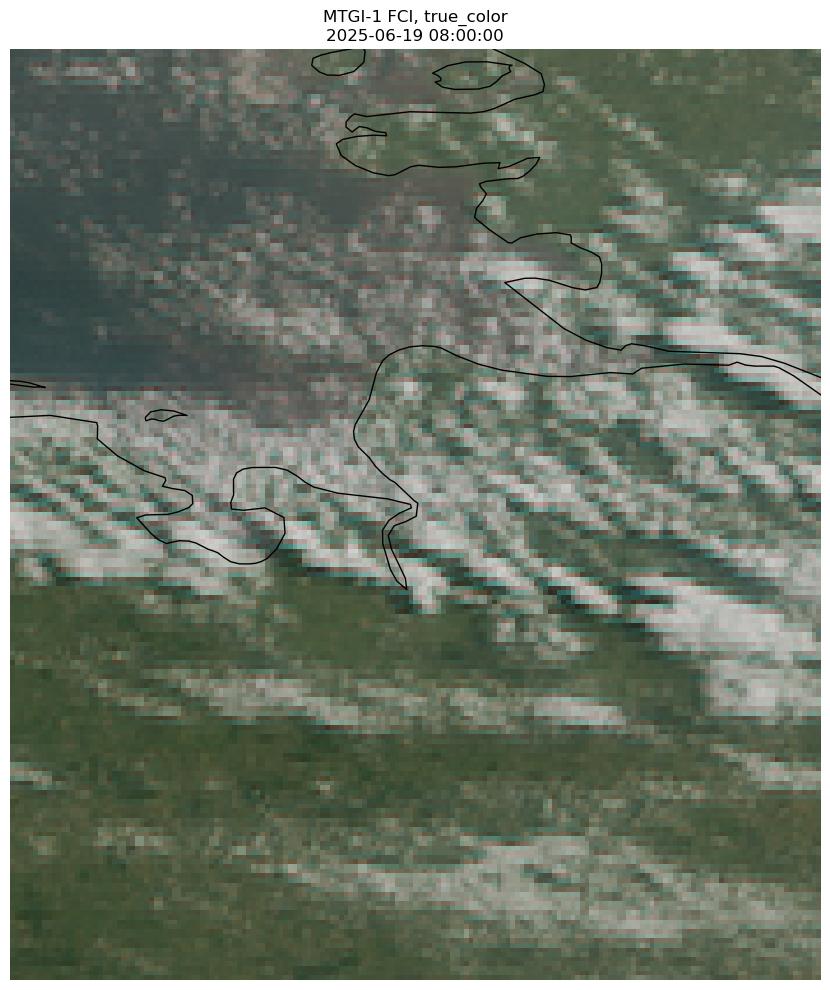

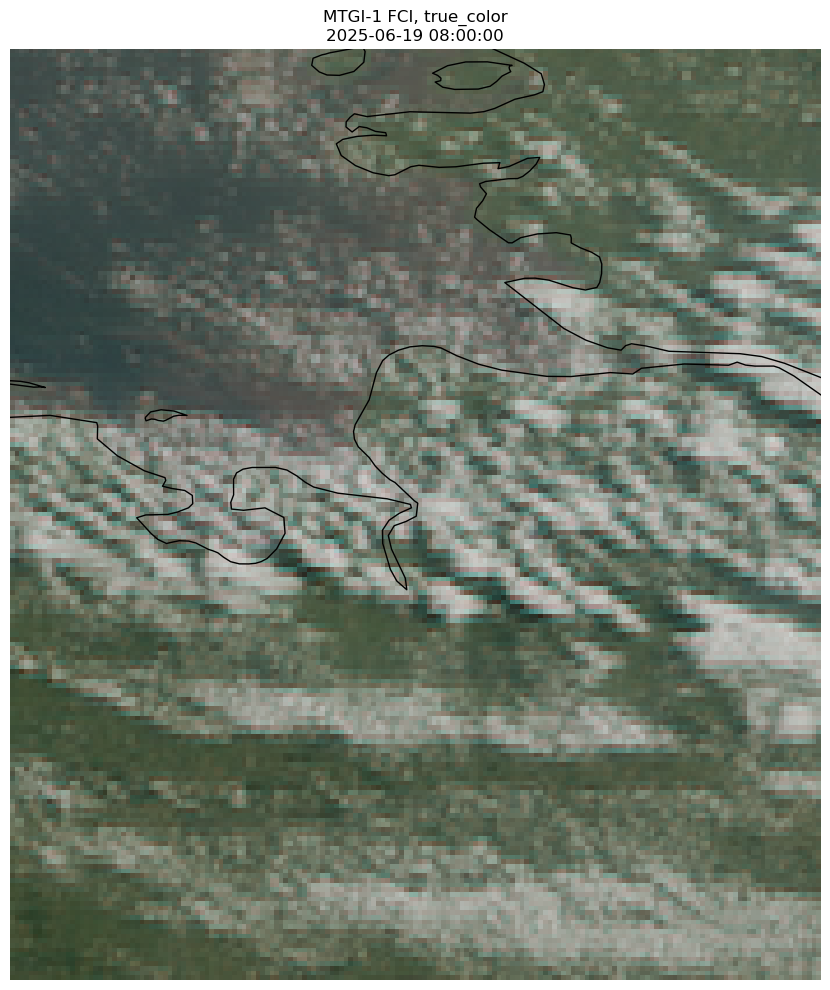

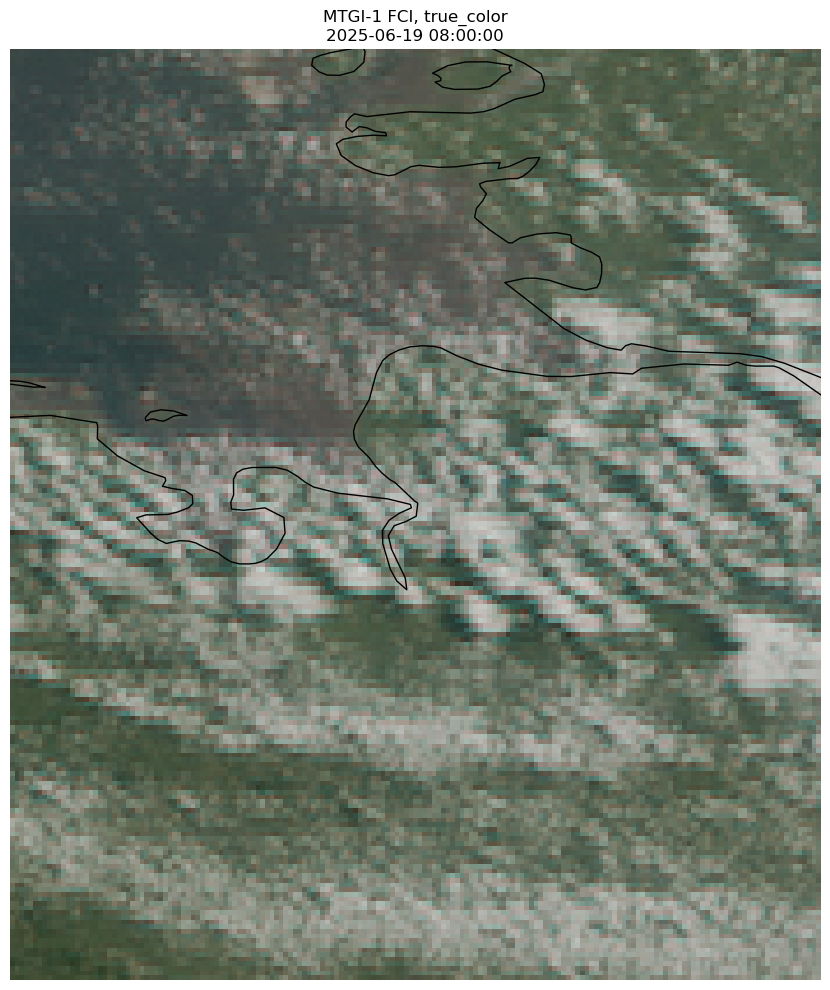

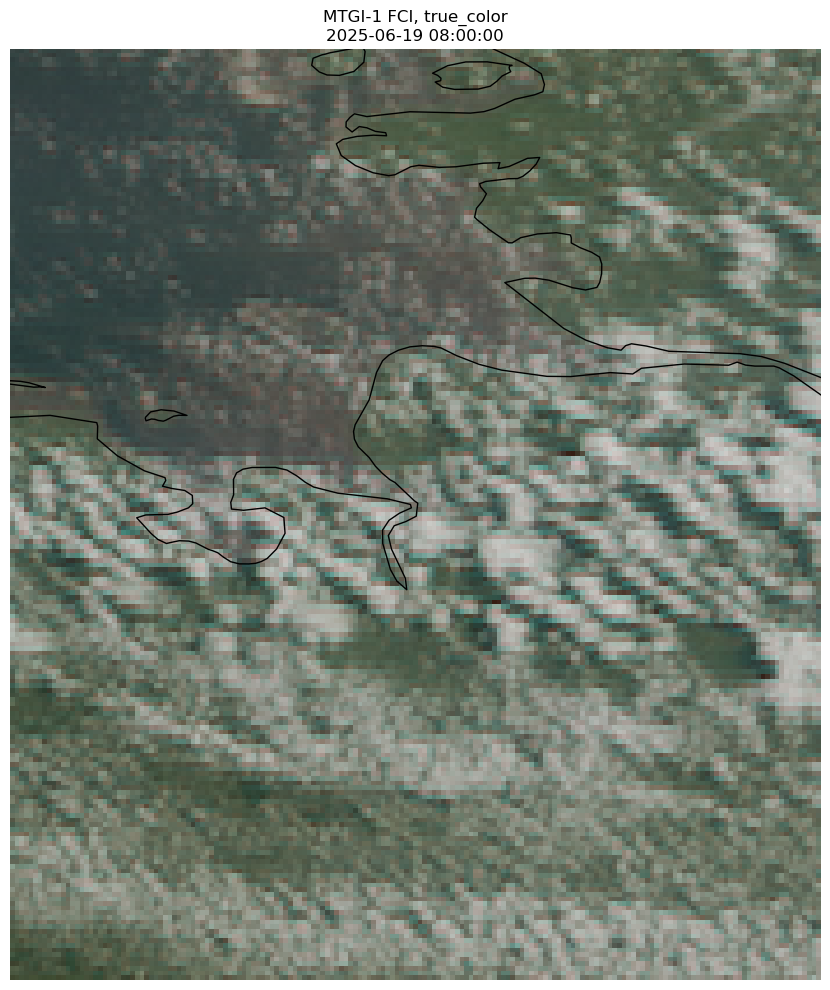

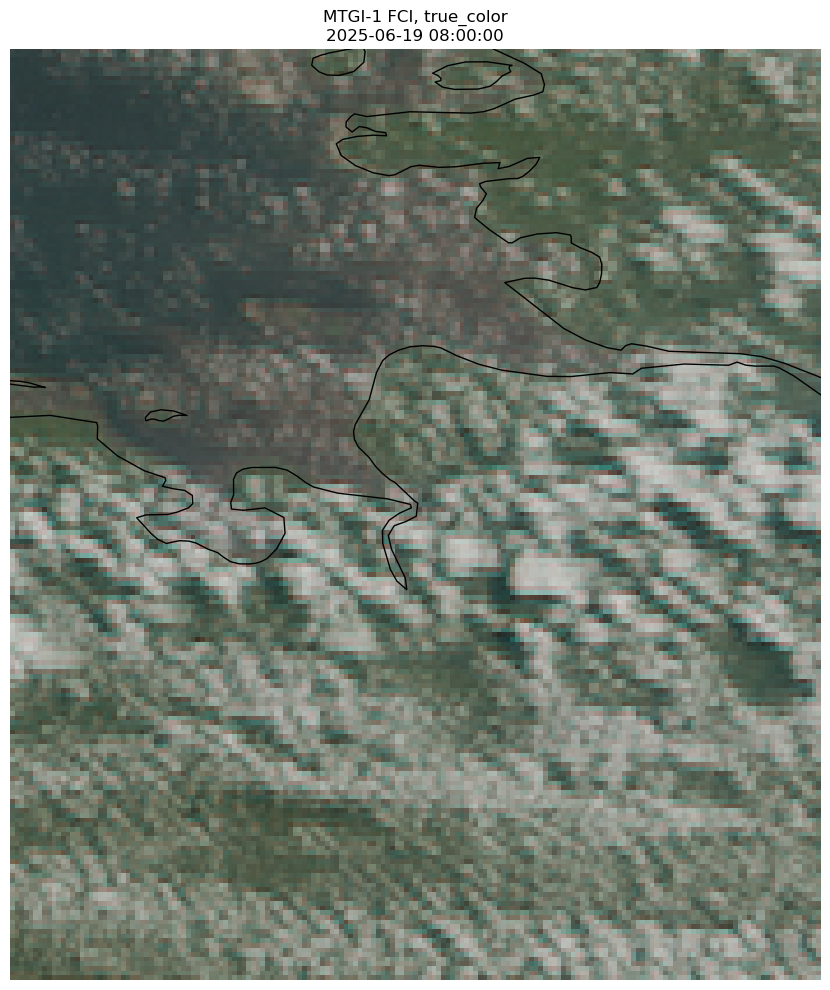

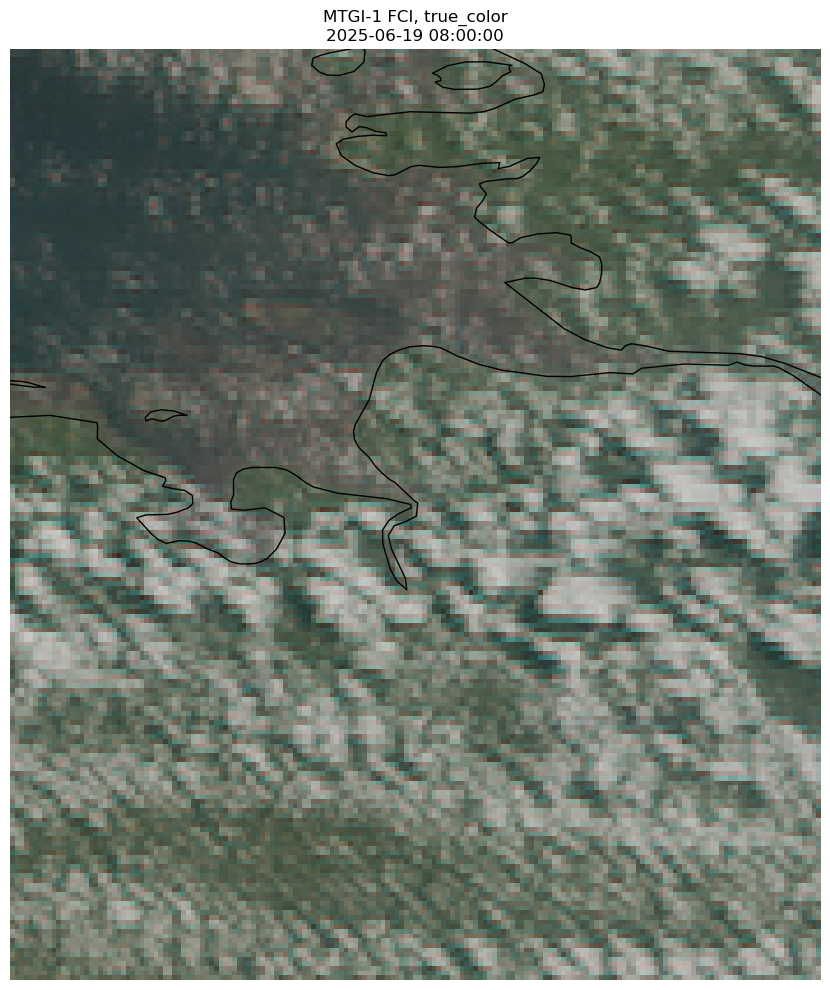

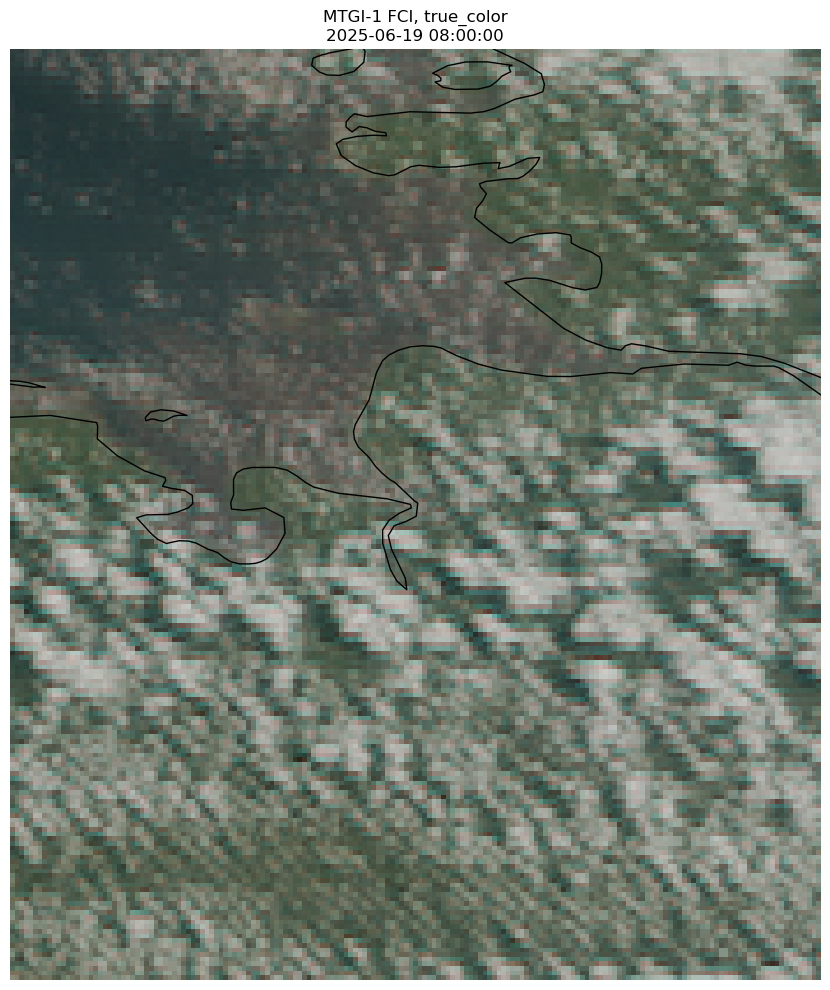

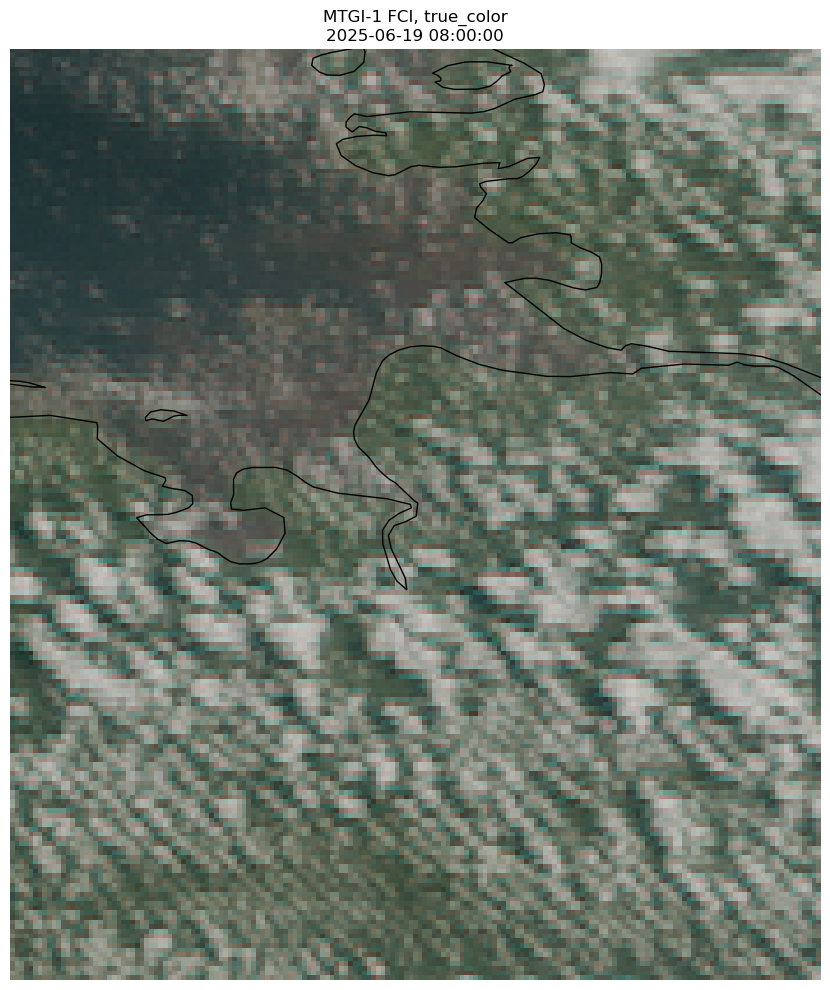

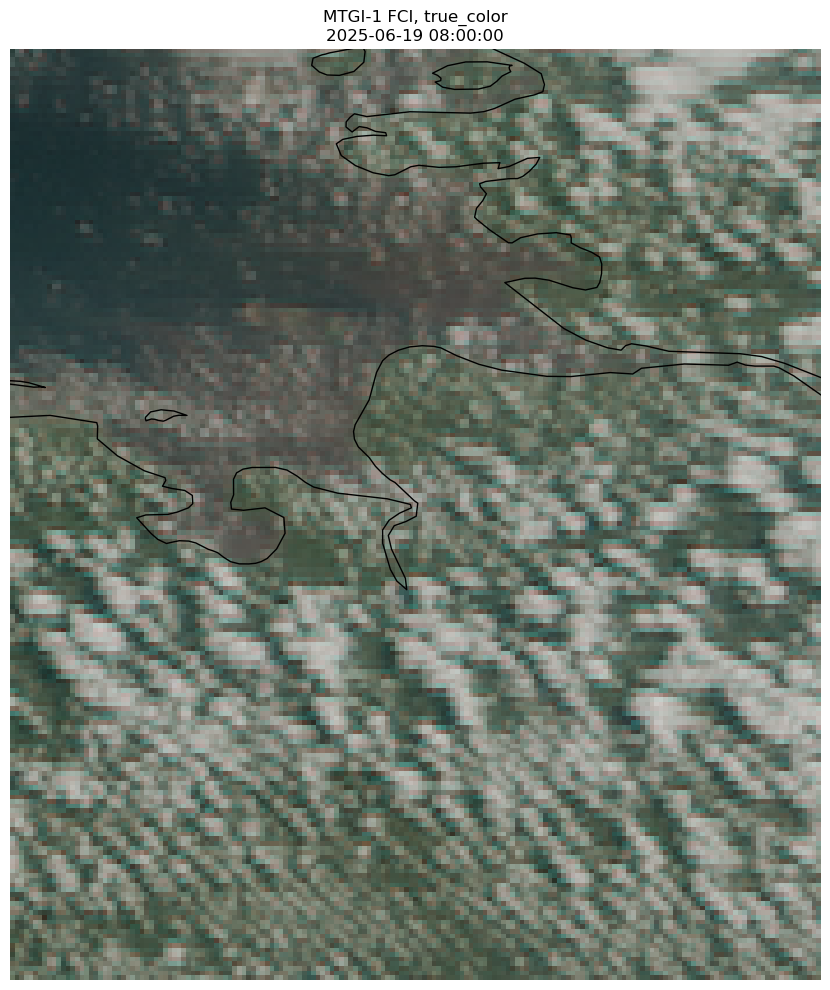

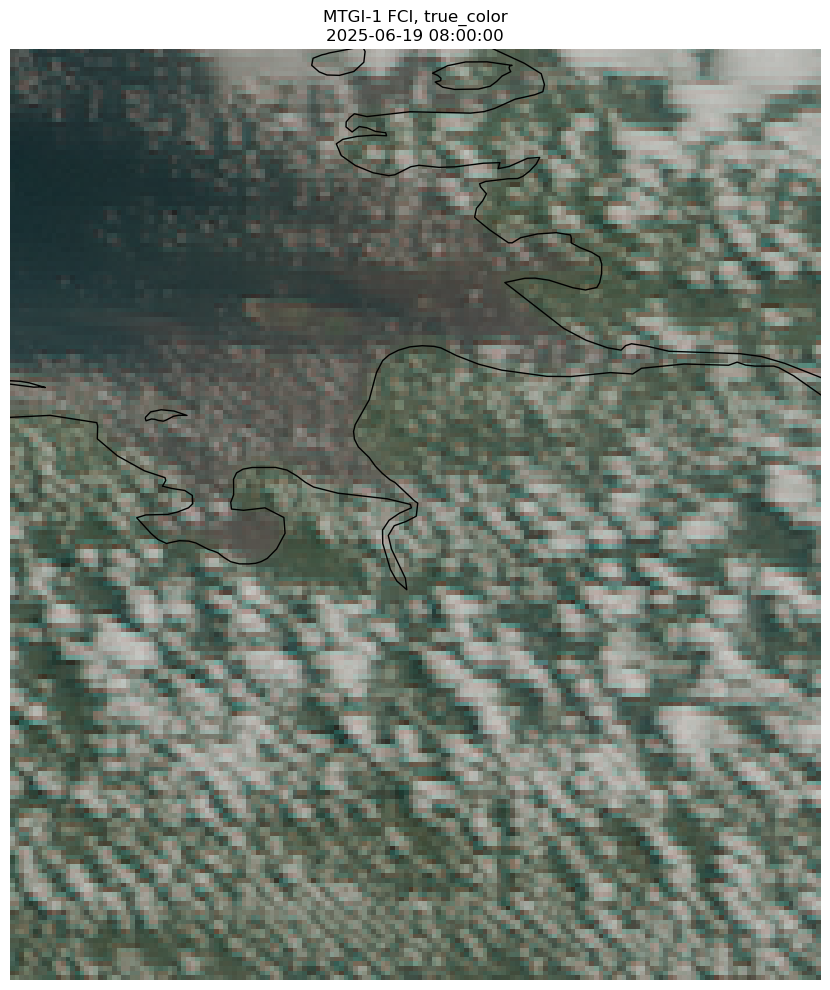

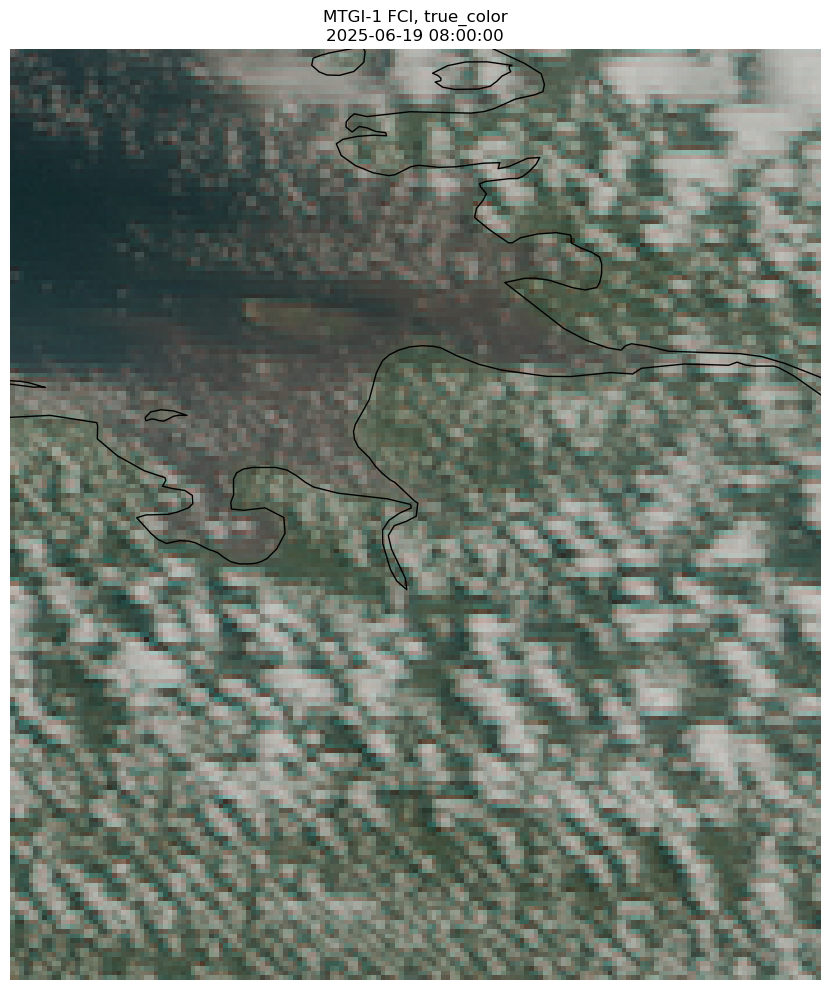

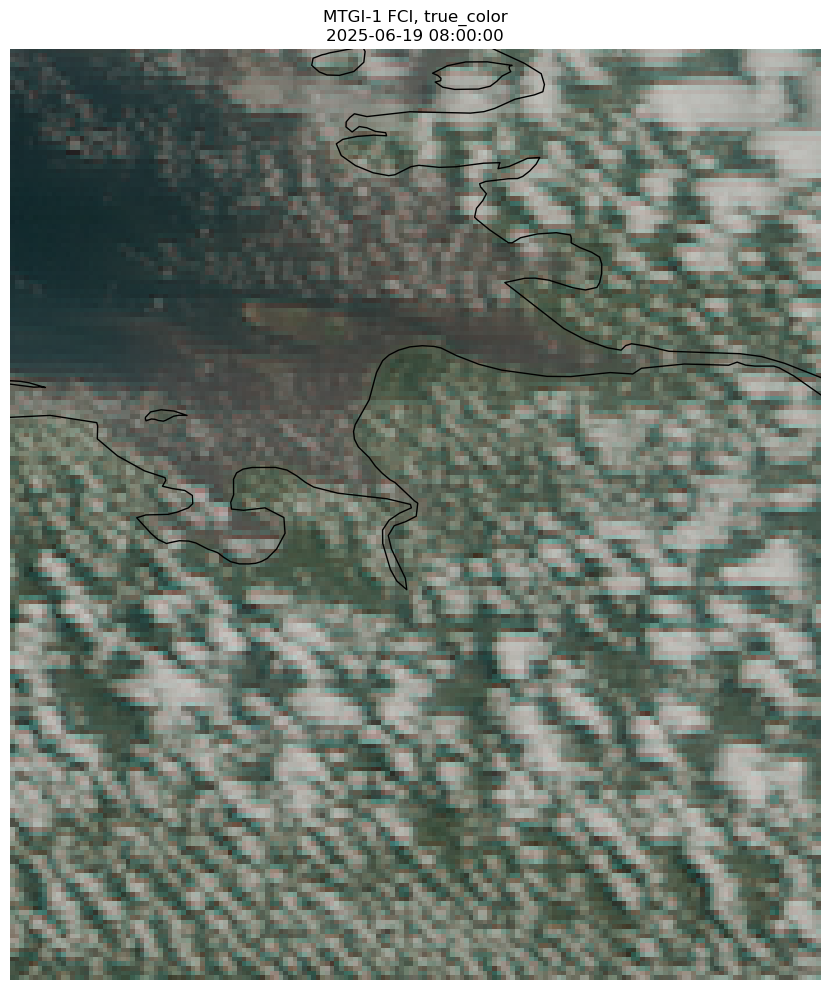

In [4]:
for RC in RCs:

    #scn = data[RC]
    
    ## handle 3-channel RGB
    #if len(scn[channel_name].shape) == 3:
    #    values = 
    #else:
        
    values = data[RC] #scn[channel_name].values


    # set geolocation information
    adef = scn[channel_name].attrs['area']
    crs = adef.to_cartopy_crs()


    fig,axs = plt.subplots(ncols=1, figsize=(10, 10),subplot_kw={'projection': crs})
    axs.coastlines(resolution='10m')
    bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                               name='admin_0_boundary_lines_land', scale='50m', facecolor='none', alpha=0.6)
    axs.add_feature(bodr, linestyle='--', edgecolor='k', alpha=0.8)
    axs.set_axis_off()
    #adapt colormap ranges
    if 'vis' or 'nir' in channel_name:
        vmin = 0
        vmax = 40
    elif 'ir' or 'wv' in channel_name:
        vmin = 260
        vmax = 300
    else:
        vmin = vmax = None

    im = axs.imshow(values, transform=crs, extent=crs.bounds,
                    interpolation='none',aspect=1,vmin=vmin,vmax=vmax)
    axs.set_title("MTGI-1 FCI, "+channel_name+"\n"+str(scn[channel_name].attrs['end_time']))
    fig.tight_layout()
#    plt.savefig("frame_{:04d}.png".format(RC))
    print("fig {:04d} done".format(RC))
#    plt.show()

In [5]:
RCs = list(range(37,48,3))

In [6]:
RCs

[37, 40, 43, 46]

fig 0037 done
fig 0040 done
fig 0043 done
fig 0046 done


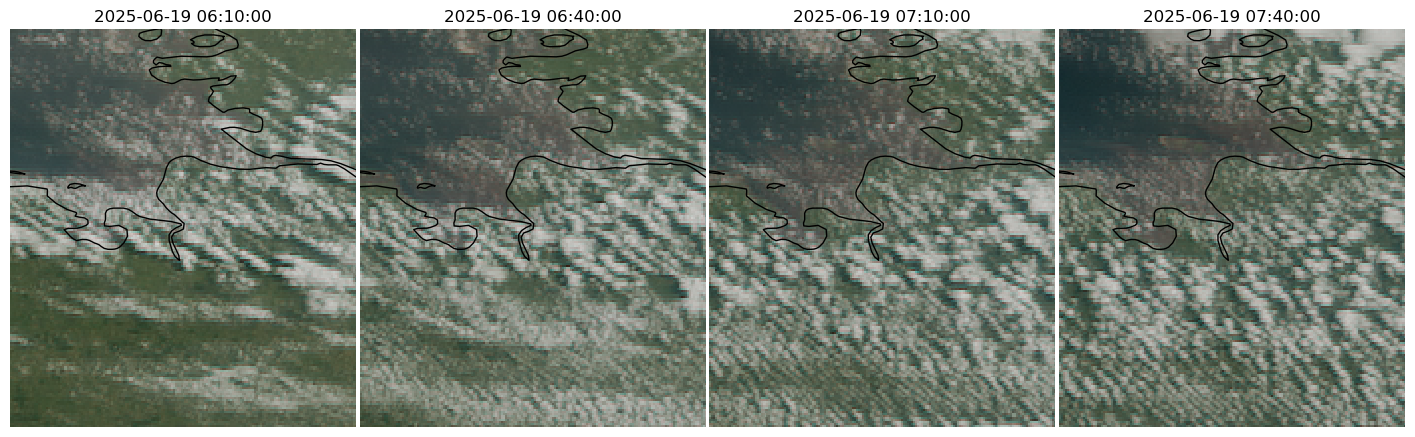

In [10]:
fig, axs_list = plt.subplots( ncols = 4, nrows = 1, figsize = (18,6), subplot_kw={'projection': crs})
plt.subplots_adjust( wspace = 0.01 )

for iax, RC in enumerate(RCs):

    #scn = data[RC]
    
    ## handle 3-channel RGB
    #if len(scn[channel_name].shape) == 3:
    #    values = 
    #else:
        
    values = data[RC] #scn[channel_name].values


    # set geolocation information
    adef = scn[channel_name].attrs['area']
    crs = adef.to_cartopy_crs()

    axs = axs_list[iax]
    axs.coastlines(resolution='10m')
    bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
                                               name='admin_0_boundary_lines_land', scale='50m', facecolor='none', alpha=0.6)
    axs.add_feature(bodr, linestyle='--', edgecolor='k', alpha=0.8)
    axs.set_axis_off()
    #adapt colormap ranges
    if 'vis' or 'nir' in channel_name:
        vmin = 0
        vmax = 40
    elif 'ir' or 'wv' in channel_name:
        vmin = 260
        vmax = 300
    else:
        vmin = vmax = None

    im = axs.imshow(values, transform=crs, extent=crs.bounds,
                    interpolation='none',aspect=1,vmin=vmin,vmax=vmax)
    axs.set_title(times[RC])
    #fig.tight_layout()
#    plt.savefig("frame_{:04d}.png".format(RC))
    print("fig {:04d} done".format(RC))
#    plt.show()

In [8]:
scn